# Data Anaysis Section
---
This section is for "Nice to Have" purpose for 2023-StateFarm-CodingCompetition. <br>
The purpose of this documentation is to find insight from given dataset and scrutinize it.

## Preparation

In [1]:
## Import libraries
from simple_data_tool import SimpleDataTool

# For Data Analysis
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point


### Data Load
Import JSON dataset into DataFrame in order to work with Python Packages

In [2]:
# Load Agent JSON data
agents = pd.read_json("data/sfcc_2023_agents.json")
agents.set_index('id', inplace=True) # Set the 'id' column as the index
df_agents = pd.json_normalize(agents.to_dict(orient='records')) # Normalize the columns

# Load Claim JSON data
claims = pd.read_json("data/sfcc_2023_claims.json")
claims.set_index('id', inplace=True) # Set the 'id' column as the index
df_claims = pd.json_normalize(claims.to_dict(orient='records')) # Normalize the columns

# Load Claim Handler JSON data
claim_handlers = pd.read_json("data/sfcc_2023_claim_handlers.json")
claim_handlers.set_index('id', inplace=True) # Set the 'id' column as the index
df_claim_handlers = pd.json_normalize(claim_handlers.to_dict(orient='records')) # Normalize the columns

# Load Disaster JSON data
disasters = pd.read_json("data/sfcc_2023_disasters.json")
disasters.set_index('id', inplace=True) # Set the 'id' column as the index
df_disasters = pd.json_normalize(disasters.to_dict(orient='records')) # Normalize the columns

### Check the info for each individual dataset

1) Get Data information and description about the data <br>
2) Normalization and Data preprocessing

In [3]:
agents.count() 

first_name            100
last_name             100
state                 100
region                100
primary_language      100
secondary_language     59
years_active          100
dtype: int64

In [4]:
agents.head()

,first_name,last_name,state,region,primary_language,secondary_language,years_active
id,,,,,,,
1,Catha,Abrahmer,Minnesota,Midwest,English,German,10
2,Yetta,Eason,Oregon,West,English,Korean,12
3,Janeta,D'Avaux,Connecticut,Northeast,English,None,47
4,Kalie,Tomkins,Virginia,South,English,None,33
5,Teddy,Dennitts,Illinois,Midwest,English,Chinese,48


In [5]:
claims.count() # count the number of each columns and missing values.

disaster_id                  1000
status                       1000
total_loss                   1000
loss_of_life                 1000
type                         1000
severity_rating              1000
estimate_cost                1000
agent_assigned_id            1000
claim_handler_assigned_id    1000
dtype: int64

In [6]:
claims.head()

,disaster_id,status,total_loss,loss_of_life,type,severity_rating,estimate_cost,agent_assigned_id,claim_handler_assigned_id
id,,,,,,,,,
1,15,Received,False,False,Auto,4,3580.02,97,50
2,24,In Review,False,False,Auto,6,1741.32,36,92
3,31,Received,True,False,Auto,4,15224.30,94,133
4,14,Received,False,True,Auto,8,6542.46,92,39
5,30,Closed,False,False,Auto,1,979.81,86,103


In [7]:
claim_handlers.count() # count the number of each columns and missing values.

first_name    156
last_name     156
dtype: int64

In [8]:
claim_handlers.head()

,first_name,last_name
id,,
1,Barnabe,Clynman
2,Valdemar,Size
3,Edithe,Bleakley
4,Sonja,Diamant
5,Elsey,Sreenan


In [9]:
disasters.count() # count the number of each columns and missing values.

type             100
state            100
name             100
description      100
start_date       100
end_date         100
declared_date    100
lat              100
long             100
radius_miles     100
dtype: int64

In [10]:
disasters.head()

,type,state,name,description,start_date,end_date,declared_date,lat,long,radius_miles
id,,,,,,,,,,
1,Flood,Alaska,Alaska Flood,Fusce consequat. Nulla nisl. Nunc nisl.\n\nDui...,2023-06-13,2023-06-20,2023-06-17,58.3271,-134.4742,168
2,Wildfire,Texas,Texas Wildfire,Duis consequat dui nec nisi volutpat eleifend....,2023-04-11,2023-04-19,2023-04-12,33.5693,-101.8904,235
3,Tornado,Virginia,Virginia Tornado,Nullam sit amet turpis elementum ligula vehicu...,2023-04-29,2023-05-07,2023-05-06,38.9776,-77.3860,273
4,Earthquake,Connecticut,Connecticut Earthquake,Fusce consequat. Nulla nisl. Nunc nisl.,2023-04-24,2023-05-09,2023-04-28,41.3657,-72.9275,120
5,Winter Storm,Missouri,Missouri Winter Storm,Suspendisse potenti. In eleifend quam a odio. ...,2023-03-11,2023-03-21,2023-03-14,39.0663,-94.5674,155


---

### Find some insight from the dataset

In [11]:
# Create a SimpleDataTool object for use calculation functions inside the class
data = SimpleDataTool()

##### Find Regional Disaster Counts #####

In [12]:
# Get the total number of disaster occurrend in the simulation
regional_disaster_map = data.get_regional_disaster_map()

In [13]:
# Initialize lists to store the data
disaster_regions = []
disaster_types = []
disaster_counts = []

# Populate the lists with data
for region, disaster in regional_disaster_map.items():
    for disaster_type, count in disaster.items():
        disaster_regions.append(region)
        disaster_types.append(disaster_type)
        disaster_counts.append(count)

# Create a DataFrame
disaster_map = pd.DataFrame({
    'Region': disaster_regions,
    'Disaster Type': disaster_types,
    'Count': disaster_counts
})

# Print the sum of the disaster regionally.
print(disaster_map.groupby(['Region']).sum().sort_values(by='Count', ascending=False))

                                               Disaster Type  Count
Region                                                             
south      WildfireTornadoEarthquakeLandslideHurricaneFlo...     36
midwest    Winter StormWildfireEarthquakeThunderstormFloo...     25
northeast  EarthquakeThunderstormFloodLandslideHurricaneW...     20
west       FloodTornadoThunderstormWildfireWinter StormHu...     19


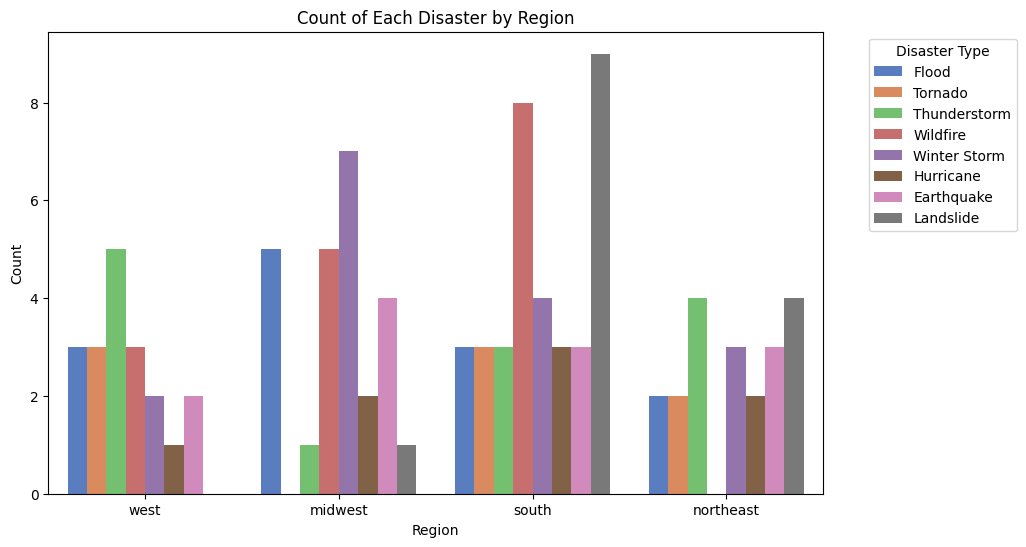

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Count', hue='Disaster Type', data=disaster_map, errorbar=None, palette='muted')
plt.title('Count of Each Disaster by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Find the number of claims by region #####

In [15]:
regional_claim_map = data.get_total_claims_per_regional_disaster()

In [16]:
# Initialize lists to store the data
claim_map_regions = []
claim_map_state = []
claim_map_counts = []

# Populate the lists with data
for region, state in regional_claim_map.items():
    for state_name, count in state.items():
        claim_map_regions.append(region)
        claim_map_state.append(state_name)
        claim_map_counts.append(count)

# Create a DataFrame
claim_map = pd.DataFrame({
    'Region': claim_map_regions,
    'Disaster Type': claim_map_state,
    'Count': claim_map_counts
})


# Print the sum of the disaster regionally.
total_claim_map = claim_map.groupby(['Region']).sum().sort_values(by='Count', ascending=False)
print(total_claim_map)

                                               Disaster Type  Count
Region                                                             
south      North CarolinaFloridaMississippiTexasGeorgiaVi...    328
midwest    MichiganMinnesotaNebraskaIowaKansasIndianaOhio...    240
west       CaliforniaArizonaWashingtonUtahIdahoColoradoAl...    224
northeast  New YorkConnecticutPennsylvaniaDistrict of Col...    208


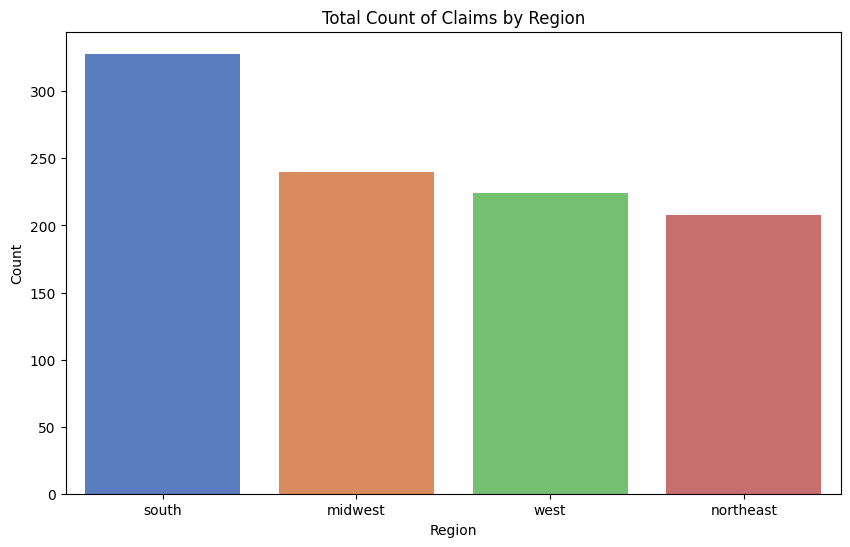

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Count', data=total_claim_map, legend=False, palette='muted', hue='Region')

plt.title('Total Count of Claims by Region')
plt.ylabel('Count')
plt.xlabel('Region')

plt.show()

---

### Geographical Disaster Map

- By using Geographical shapefile, we can plot specific points within the map.
- shapefile resources are from ScienceBase.gov portal (https://www.sciencebase.gov/catalog/item/4f4e4783e4b07f02db4837ce)

In [18]:
# Group by 'lat' and 'long' and count the occurrences
location_counts = disasters.groupby(['lat', 'long']).size().reset_index(name='counts')

# Merge the counts back into the original DataFrame
disasters = disasters.merge(location_counts, on=['lat', 'long'])

# Normalize the counts for plotting purposes
# This will scale the counts to a range suitable for the markersize or alpha
max_count = disasters['counts'].max()
disasters['normalized_counts'] = disasters['counts'] / max_count

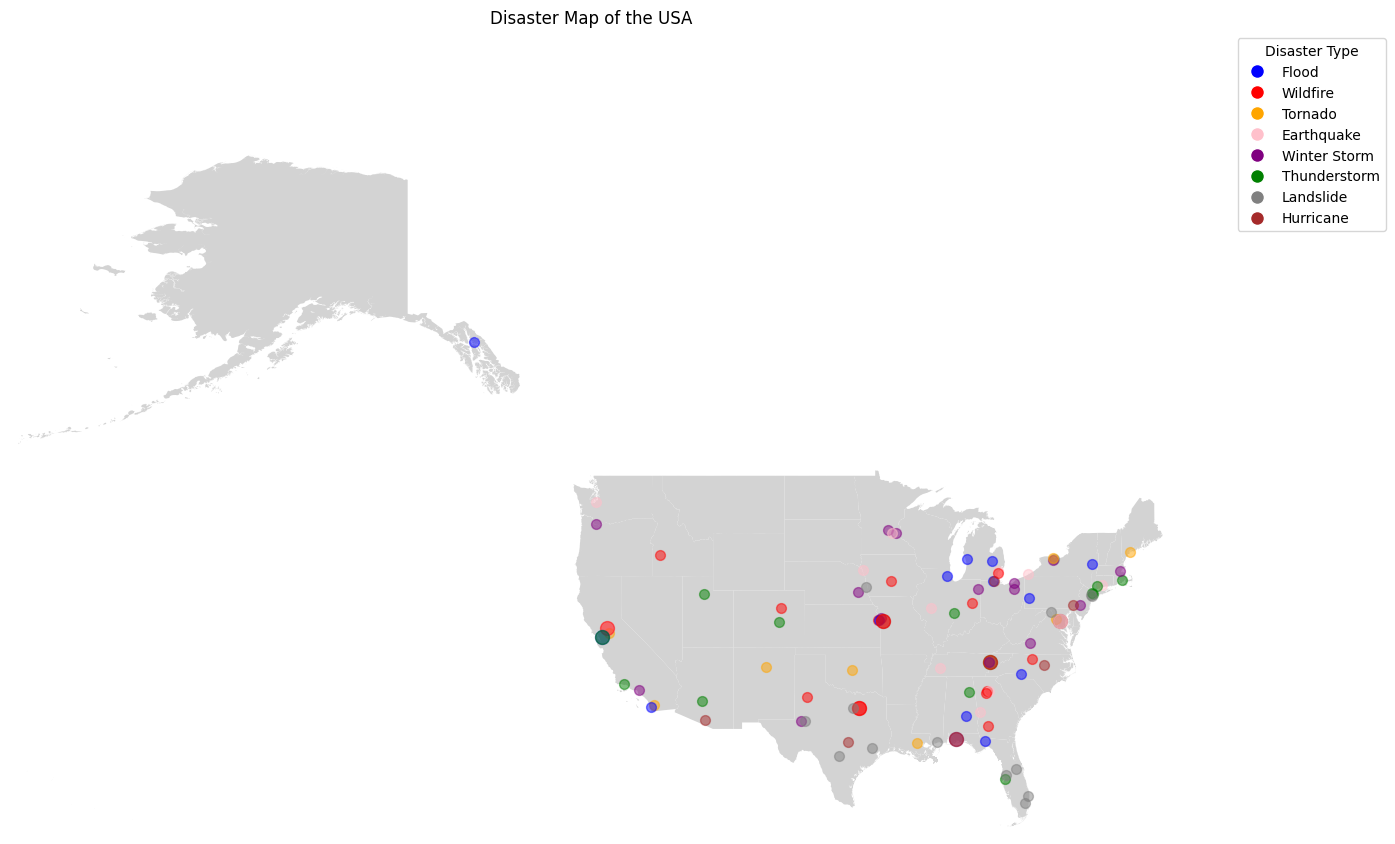

In [19]:
# Load the shapefile
us_states = gpd.read_file('data/map/US_States.shp')

# Convert the disaster data into GeoDataFrame
gdf = gpd.GeoDataFrame(disasters, geometry=gpd.points_from_xy(disasters['long'], disasters['lat']))

# Plot the states
fig, ax = plt.subplots(figsize=(15, 15))
us_states.plot(ax=ax, color='lightgrey')

# Plot each disaster point with a different color based on the type of disaster
disaster_types = gdf['type'].unique()
colors = ['blue', 'red', 'orange', 'pink', 'purple', 'green', 'grey', 'brown']  # Define more colors if you have more types
color_dict = dict(zip(disaster_types, colors))

# Iterate through the disaster types and plot them
for idx, row in gdf.iterrows():
    ax.scatter(row['geometry'].x, row['geometry'].y, s = 100 * row['normalized_counts'],  # scale size by normalized count
               color=color_dict[row['type']], alpha=0.5)  # scale alpha by normalized count


# Set the x and y axis limits to fit the contiguous US
ax.set_xlim(-180, -66)
ax.set_ylim(24, 80)
ax.set_title('Disaster Map of the USA')

# Create a legend for the disaster types
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=disaster_type,
                              markerfacecolor=color, markersize=10)
                   for disaster_type, color in color_dict.items()]
ax.legend(handles=legend_elements, title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Remove the x and y axis since they often aren't useful in a geographical plot
ax.set_axis_off()

# Show the plot
plt.show()


---

In [20]:
# Get the total number of disaster occurrend in individual region/states
total_claim_per_state = data.get_total_claims_per_regional_disaster()

# Separte the data into two lists for plotting
claims_list = [(state, claims) for region, states in total_claim_per_state.items() for state, claims in states.items()]
claims_per_state_table = pd.DataFrame(claims_list, columns=['state', 'claims'])

In [32]:
claims_per_state_table.sort_values(by='claims', ascending=False, inplace=True)
claims_per_state_table

,state,claims
0,California,100
20,Texas,89
27,New York,86
18,Florida,67
14,Ohio,52
29,Pennsylvania,44
8,Michigan,40
25,Tennessee,39
21,Georgia,32
13,Indiana,32


In [22]:
us_states.head()

,STFIPS,STATE,STPOSTAL,VERSION,DotRegion,Shape_Leng,Shape_Area,geometry
0,02,Alaska,AK,05,10,1033.192917,278.612681,"MULTIPOLYGON (((-148.62042 60.90747, -148.6182..."
1,30,Montana,MT,05,8,36.656062,45.078808,"POLYGON ((-104.05770 44.99743, -104.05954 44.9..."
2,16,Idaho,ID,05,10,31.141332,24.456703,"POLYGON ((-117.12337 44.60405, -117.12187 44.6..."
3,38,North Dakota,ND,05,8,25.154998,21.839700,"POLYGON ((-96.78089 46.61976, -96.78022 46.619..."
4,27,Minnesota,MN,05,5,36.513438,25.535173,"MULTIPOLYGON (((-92.20109 46.70614, -92.20159 ..."


In [28]:
# Merge the claims data with the shapefile to get the geometry
heatmap_gdf = us_states.merge(claims_per_state_table, left_on='STATE', right_on='state')
heatmap_gdf['claims'].fillna(0, inplace=True)

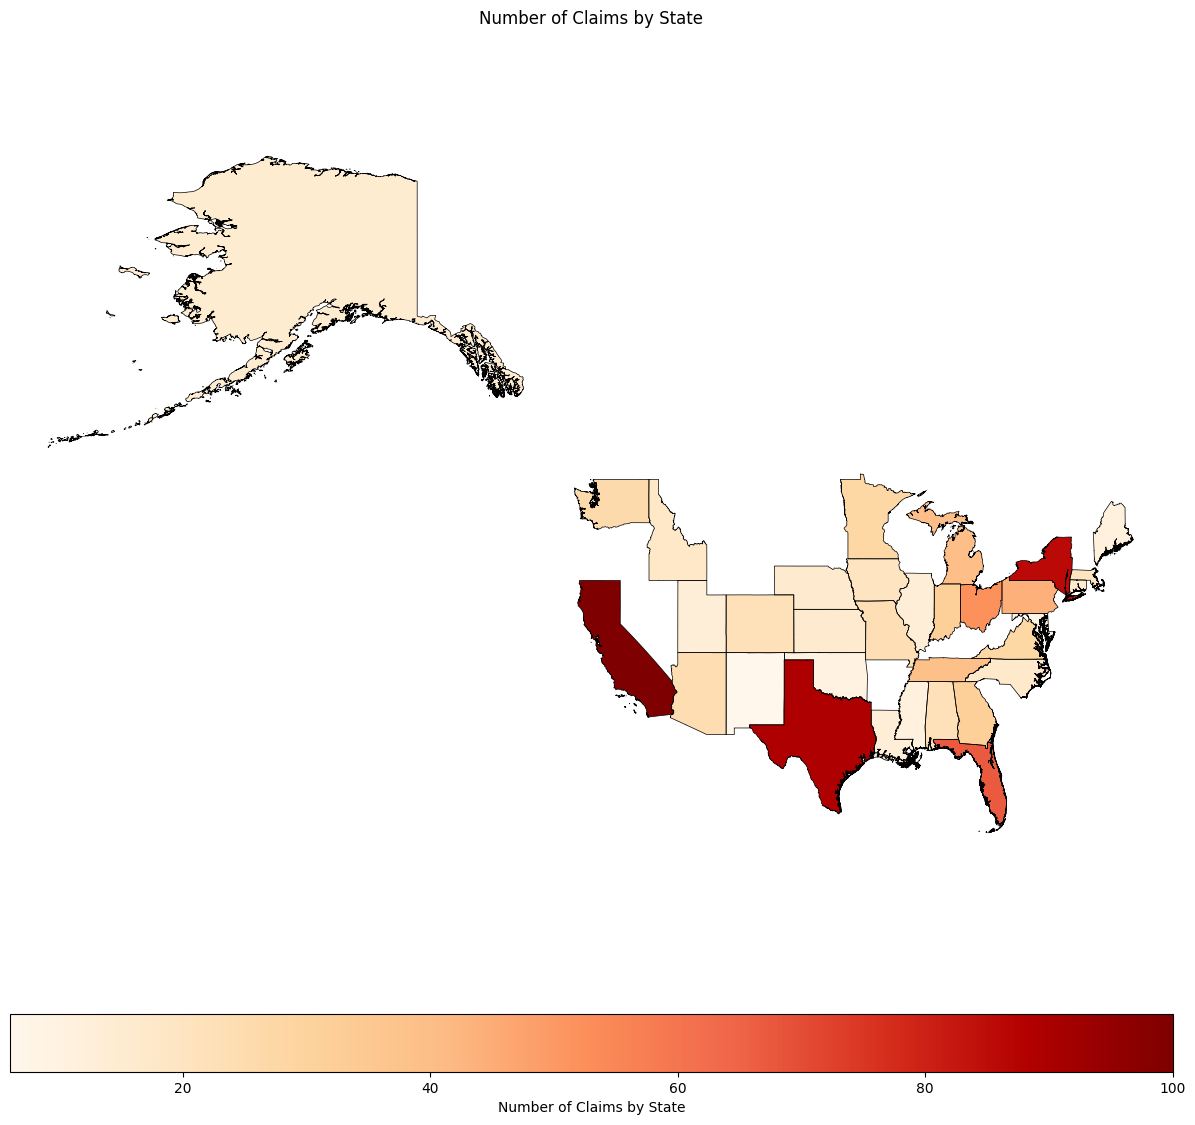

In [29]:
# Heatmap Definition
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
heatmap_gdf.plot(column='claims', ax=ax, cmap='OrRd', legend=True,
                legend_kwds={'label': "Number of Claims by State",
                             'orientation': "horizontal"})

# Plot state borders on top of the heatmap
heatmap_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)  # Adjust linewidth as needed


# Remove the axis for a cleaner look
ax.set_axis_off()

# Set a title for the map
ax.set_title('Number of Claims by State')

# Set figure size
ax.set_xlim(-180, -66)
ax.set_ylim(24, 80)

# Show the plot
plt.show()